In [1]:
import pandas as pd
from sklearn.metrics import precision_score,recall_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
############No need to run these codes now ############################

In [83]:
#presultsOurYeast1=pd.read_csv("./results/tesryeast1.txt",header =None)

In [2]:
presultsOurYeast1=pd.read_csv("./yeast10kgt1.txt",header =None)

In [99]:
presultsOurYeast0=pd.read_csv("./resul.txt",header =None)

In [3]:
presultsOurYeast0=pd.read_csv("./yeast10k_ind.txt",header =None)

In [5]:
presultsOurYeast1

,0,1,2,3
0,51284,0.0,0.10,0.40
1,34249,0.0,0.15,0.11
2,13206,0.0,0.02,0.03
3,58486,0.0,0.55,0.38
4,1225,0.0,0.05,0.69
...,...,...,...,...
9995,25267,0.0,0.14,1.00
9996,32328,0.0,0.02,0.96
9997,14865,0.0,0.88,0.87
9998,14058,0.0,0.14,1.00


In [122]:
presultsLinear=pd.read_csv("./results/tesrlinear100.txt",header=None)

In [123]:
presultsLinear.loc[:,0]=1

In [124]:
presultsInd=pd.read_csv("./results/tesrInd.txt",header=None)

In [87]:
presultsInd.loc[:,0]=0

In [6]:
presultsOurYeast1.loc[:,0]=1 #labelling it as gnd truth 1 

In [7]:
presultsOurYeast0.loc[:,0]=0  #labelling it as gnd truth 0

In [8]:
presultsOurYeast=pd.concat([presultsOurYeast1,presultsOurYeast0],ignore_index=True)

In [88]:
presultMix=pd.concat([presultsLinear,presultsInd],ignore_index=True)

In [21]:
#presultsOurYeast['results']=presultsOurYeast.apply (lambda row: 1 if max(row[1],row[2],row[3]) <0.05   else 0, axis=1)

In [69]:
presultsOurYeast.columns = ['GroundTruth','p_LA', 'p_LB', 'diff_test']#, 'final_call']

In [89]:
presultMix.columns= ['GroundTruth','p_L->A', 'p_L->B', 'diff(B|A,B|A,L)']

In [70]:
presultsOurYeast

,GroundTruth,p_LA,p_LB,diff_test
0,1,0.00,0.10,0.40
1,1,0.00,0.15,0.11
2,1,0.00,0.02,0.03
3,1,0.00,0.55,0.38
4,1,0.00,0.05,0.69
...,...,...,...,...
19995,0,0.00,0.10,0.86
19996,0,0.00,0.36,0.45
19997,0,0.01,0.48,0.79
19998,0,0.00,0.10,0.32


In [91]:
presultMix

,GroundTruth,p_L->A,p_L->B,"diff(B|A,B|A,L)"
0,1,0.00,0.08,0.05
1,1,0.00,0.01,0.00
2,1,0.00,0.00,0.53
3,1,0.00,0.00,0.00
4,1,0.00,0.00,0.07
...,...,...,...,...
260,0,0.23,0.58,0.30
261,0,0.03,0.01,0.63
262,0,0.14,0.00,0.62
263,0,0.00,0.00,0.16


In [92]:
presultMix.to_csv("MixSineandIndOurmethod.csv",index=False)

In [71]:
presultsOurYeast.to_csv("YeastbothresultsOurmethod10k.csv",index=False)

In [72]:
test=pd.read_csv("YeastbothresultsOurmethod10k.csv")

In [73]:
test

,GroundTruth,p_LA,p_LB,diff_test
0,1,0.00,0.10,0.40
1,1,0.00,0.15,0.11
2,1,0.00,0.02,0.03
3,1,0.00,0.55,0.38
4,1,0.00,0.05,0.69
...,...,...,...,...
19995,0,0.00,0.10,0.86
19996,0,0.00,0.36,0.45
19997,0,0.01,0.48,0.79
19998,0,0.00,0.10,0.32


In [11]:
citresultsyeast1= pd.read_csv("../LinearDifferentvalues/CIT_testing/result_yeast10kcausal.csv")

In [93]:
citresultsLinear=pd.read_csv("../LinearDifferentvalues/CIT_testing/results_cit_sine.csv")

In [12]:
citresultsyeast1.loc[:,'p_res']=1

In [94]:
citresultsLinear.loc[:,'p_res']=1

In [95]:
citresultsLinear

,p_cit,p_TL,p_TG,p_GL,p_Lind,p_res
0,0.368165,0.368165,1.168653e-01,2.921708e-01,0.167296,1
1,0.762668,0.184285,1.157742e-02,7.626679e-01,0.731331,1
2,0.954974,0.954974,1.159190e-05,9.552992e-02,0.921065,1
3,0.747074,0.034780,1.122873e-12,7.470740e-01,0.009708,1
4,1.000000,0.019203,4.622717e-16,1.603040e-01,1.000000,1
...,...,...,...,...,...,...
116,0.557481,0.557481,3.683477e-01,6.041759e-235,0.272225,1
117,0.653631,0.653631,5.296709e-01,2.027890e-267,0.343932,1
118,0.870004,0.624709,1.734063e-01,3.597769e-250,0.870004,1
119,0.692347,0.079510,5.194507e-01,8.347638e-251,0.692347,1


In [13]:
citresultsyeast0= pd.read_csv("../LinearDifferentvalues/CIT_testing/result_yeast10kindep.csv")

In [96]:
citresultsInd=pd.read_csv("../LinearDifferentvalues/CIT_testing/results_cit_ind.csv")

In [14]:
citresultsyeast0.loc[:,'p_res']=0

In [97]:
citresultsInd.loc[:,'p_res']=0

In [98]:
citresultsMix=pd.concat([citresultsLinear,citresultsInd],ignore_index=True)

In [15]:
citresultsyeast=pd.concat([citresultsyeast1,citresultsyeast0],ignore_index=True)

In [16]:
citresultsyeast

,p_cit,p_TL,p_TG,p_GL,p_Lind,p_res
0,1.000000,0.514555,1.910689e-12,7.209328e-07,9.999999e-01,1
1,1.000000,0.772809,9.724937e-24,1.931307e-37,1.000000e+00,1
2,0.409541,0.409541,2.779392e-02,1.260609e-04,1.324487e-02,1
3,0.052293,0.052293,3.294569e-46,3.305944e-08,1.485647e-11,1
4,0.046678,0.000184,4.667800e-02,0.000000e+00,4.547678e-04,1
...,...,...,...,...,...,...
19995,1.000000,0.022778,1.041819e-11,1.319008e-07,1.000000e+00,0
19996,0.709476,0.127644,2.764153e-36,5.546580e-16,7.094757e-01,0
19997,0.999999,0.991167,1.761116e-38,3.069884e-03,9.999995e-01,0
19998,0.582589,0.409149,5.825888e-01,9.672949e-04,3.218697e-01,0


In [99]:
citresultsMix

,p_cit,p_TL,p_TG,p_GL,p_Lind,p_res
0,0.368165,3.681653e-01,1.168653e-01,2.921708e-01,0.167296,1
1,0.762668,1.842854e-01,1.157742e-02,7.626679e-01,0.731331,1
2,0.954974,9.549737e-01,1.159190e-05,9.552992e-02,0.921065,1
3,0.747074,3.478044e-02,1.122873e-12,7.470740e-01,0.009708,1
4,1.000000,1.920307e-02,4.622717e-16,1.603040e-01,1.000000,1
...,...,...,...,...,...,...
260,0.693343,1.113714e-29,5.810552e-01,6.015304e-232,0.693343,0
261,0.788440,1.390011e-31,7.884398e-01,6.374398e-221,0.601401,0
262,0.734262,3.525310e-53,4.188774e-01,1.747853e-227,0.734262,0
263,0.951677,9.990723e-51,5.198720e-02,5.086993e-241,0.951677,0


In [17]:
citresultsyeast.rename(columns={'p_res':'GroundTruth'},inplace=True)

In [100]:
citresultsMix.rename(columns={'p_res':'GroundTruth'},inplace=True)

In [22]:
#citresultsMix.to_csv("MixSineandIndCIT10k.csv",index=False)

NameError: name 'citresultsMix' is not defined

In [23]:
citresultsyeast.to_csv("YeastbothresultsCIT10k.csv",index=False)

In [116]:
test=pd.read_csv("YeastbothresultsCIT.csv")

In [117]:
test

,p_cit,p_TL,p_TG,p_GL,p_Lind,GroundTruth
0,0.999997,0.526752,1.451417e-42,3.025060e-13,0.999997,1
1,0.770998,0.770998,3.154449e-05,4.327071e-06,0.654044,1
2,0.160258,0.013723,1.478439e-01,2.326003e-04,0.160258,1
3,0.864296,0.304704,8.642960e-01,2.939863e-71,0.735532,1
4,0.999992,0.797223,4.165822e-12,2.051547e-34,0.999992,1
...,...,...,...,...,...,...
1995,1.000000,0.044756,4.255630e-08,3.497283e-07,1.000000,0
1996,0.923909,0.116567,1.282423e-01,5.183201e-60,0.923909,0
1997,1.000000,0.246241,1.240799e-121,4.313804e-87,1.000000,0
1998,1.000000,0.767710,1.409244e-20,9.823368e-59,1.000000,0


In [ ]:
######## Run it from here ###########

In [2]:
cit=pd.read_csv("YeastbothresultsCIT10k.csv")
#cit=pd.read_csv("MixSineandIndCIT.csv")
ourmethod=pd.read_csv("YeastbothresultsOurmethod10k.csv")
#ourmethod=pd.read_csv("MixSineandIndOurmethod1.csv")

In [37]:
cit

,p_cit,p_TL,p_TG,p_GL,p_Lind,GroundTruth
0,1.000000,0.514555,1.910689e-12,7.209328e-07,9.999999e-01,1
1,1.000000,0.772809,9.724937e-24,1.931307e-37,1.000000e+00,1
2,0.409541,0.409541,2.779392e-02,1.260609e-04,1.324487e-02,1
3,0.052293,0.052293,3.294569e-46,3.305944e-08,1.485647e-11,1
4,0.046678,0.000184,4.667800e-02,0.000000e+00,4.547678e-04,1
...,...,...,...,...,...,...
19995,1.000000,0.022778,1.041819e-11,1.319008e-07,1.000000e+00,0
19996,0.709476,0.127644,2.764153e-36,5.546580e-16,7.094757e-01,0
19997,0.999999,0.991167,1.761116e-38,3.069884e-03,9.999995e-01,0
19998,0.582589,0.409149,5.825888e-01,9.672949e-04,3.218697e-01,0


In [19]:
ourmethod.columns

Index(['GroundTruth', 'p_L->A', 'p_L->B', 'diff(B|A,B|A,L)'], dtype='object')

In [31]:
kvalues=np.linspace(0,1,500)

In [3]:
pvalues=np.array([0.05,0.10,0.30,0.50,1,2,5,10,20,40,80,100])

In [4]:
pvalues/=100

In [46]:
pvalues

array([5.e-04, 1.e-03, 3.e-03, 5.e-03, 1.e-02, 2.e-02, 5.e-02, 1.e-01,
       2.e-01, 4.e-01, 8.e-01, 1.e+00])

In [62]:
for j in pvalues:
    print(j)

0.0005
0.001
0.003
0.005
0.01
0.02
0.05
0.1
0.2
0.4
0.8
1.0


In [47]:
kvalues

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [52]:
def plot_pr(path,kvalues,cit=False):
   
    precision=[]
    recall=[]
    for i in kvalues:
        
        df=pd.read_csv(path)
        #print(df)
        data=df
        if(cit==True):
            #chanign from < to <=
            data['results']=data.apply (lambda row: 1 if max(row[1],row[2],row[3]) <=i   else 0, axis=1)
        else:
            data['results']=data.apply (lambda row: 1 if row[0] <=i   else 0, axis=1)
        #pred_labels=data['results']
        #true_labels=data['GroundTruth']
        #TP = np.sum(np.logical_and(pred_labels == 1, true_labels == 1))

        # True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
        #TN = np.sum(np.logical_and(pred_labels == 0, true_labels == 0))

        # False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
        #FP = np.sum(np.logical_and(pred_labels == 1, true_labels == 0))

        # False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
        #FN = np.sum(np.logical_and(pred_labels == 0, true_labels == 1))
        
        #Precision
        #P= TP/(TP+FP)
        #Recall
        #R= TP/(TP+FN)
        #precision.append(P)#precision_score(data['GroundTruth'],data['results']))#,zero_division=1))
        #recall.append(R)#recall_score(data['GroundTruth'],data['results']))#,zero_division=1))
        precision.append(precision_score(data['GroundTruth'],data['results']))
        recall.append(recall_score(data['GroundTruth'],data['results']))
        
        #zipped=zip(precision,recall)
        #z=sorted(zipped, key = lambda t: t[1])
        #precision,recall=zip(*z)
        #aupr.append(metrics.auc(recall,precision))
    #return aupr
    #return [data['GroundTruth'],data['results']]
    zipped=zip(precision,recall)
    z=sorted(zipped, key = lambda t: t[1])
    precision,recall=zip(*z)
    return [recall,precision]

In [53]:
x_our,y_our=plot_pr("YeastbothresultsOurmethod10k.csv",kvalues)
#aupr_our=plot_pr("YeastbothresultsOurmethod10k.csv",kvalues)
#for i in range(len(x_our)):
#    print(metrics.auc(x_our[i],y_our[i]))
#x_our,y_our=plot_pr("MixSineandIndOurmethod.csv",kvalues)
#PrecisionRecallDisplay.from_predictions(x_our, y_our, name="LinearSVC",pos_label=0)
#aupr_our=metrics.auc(x_our,y_our)

In [44]:
x_our


(0.0041,
 0.0041,
 0.0041,
 0.0041,
 0.0041,
 0.0072,
 0.0072,
 0.0072,
 0.0072,
 0.0072,
 0.0102,
 0.0102,
 0.0102,
 0.0102,
 0.0102,
 0.0133,
 0.0133,
 0.0133,
 0.0133,
 0.0133,
 0.016,
 0.016,
 0.016,
 0.016,
 0.016,
 0.0188,
 0.0188,
 0.0188,
 0.0188,
 0.0188,
 0.0225,
 0.0225,
 0.0225,
 0.0225,
 0.0225,
 0.0254,
 0.0254,
 0.0254,
 0.0254,
 0.0254,
 0.0281,
 0.0281,
 0.0281,
 0.0281,
 0.0281,
 0.0314,
 0.0314,
 0.0314,
 0.0314,
 0.0314,
 0.0349,
 0.0349,
 0.0349,
 0.0349,
 0.0349,
 0.0382,
 0.0382,
 0.0382,
 0.0382,
 0.0382,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.0458,
 0.0458,
 0.0458,
 0.0458,
 0.0458,
 0.0492,
 0.0492,
 0.0492,
 0.0492,
 0.0492,
 0.0531,
 0.0531,
 0.0531,
 0.0531,
 0.0531,
 0.0572,
 0.0572,
 0.0572,
 0.0572,
 0.0572,
 0.0607,
 0.0607,
 0.0607,
 0.0607,
 0.0607,
 0.0655,
 0.0655,
 0.0655,
 0.0655,
 0.0655,
 0.0703,
 0.0703,
 0.0703,
 0.0703,
 0.0703,
 0.0745,
 0.0745,
 0.0745,
 0.0745,
 0.0745,
 0.0779,
 0.0779,
 0.0779,
 0.0779,
 0.0779,
 0.0818,
 0.0818,
 0

In [45]:
y_our

(0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.7192982456140351,
 0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.6538461538461539,
 0.6538461538461539,
 0.6538461538461539,
 0.6538461538461539,
 0.6538461538461539,
 0.6186046511627907,
 0.6186046511627907,
 0.6186046511627907,
 0.6186046511627907,
 0.6186046511627907,
 0.5970149253731343,
 0.5970149253731343,
 0.5970149253731343,
 0.5970149253731343,
 0.5970149253731343,
 0.562874251497006,
 0.562874251497006,
 0.562874251497006,
 0.562874251497006,
 0.562874251497006,
 0.5710659898477157,
 0.5710659898477157,
 0.5710659898477157,
 0.5710659898477157,
 0.5710659898477157,
 0.5594713656387665,
 0.5594713656387665,
 0.5594713656387665,
 0.5594713656387665,
 0.5594713656387665,
 0.548828125,
 0.548828125,
 0.548828125,
 0.548828125,
 0.548828125,
 0.5441941074523396,
 0.5441941074523396,
 0.5441941074523396,
 0.5441941074523396,
 0.54419410

In [49]:
x_our

(0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4297520661157025,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4462809917355372,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.4628099173553719,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.5041322314049587,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,
 0.512396694214876,


In [55]:
x_cit,y_cit=plot_pr("YeastbothresultsCIT.csv",kvalues,True)
#kvalues[0]=min(cit['p_cit'])
#x_cit,y_cit=plot_pr("MixSineandIndCIT.csv",kvalues,True)
#PrecisionRecallDisplay.from_predictions(x_our, y_our, name="LinearSVC")
#aupr_cit=metrics.auc(x_cit,y_cit)

/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
aupr_cit=plot_pr("YeastbothresultsCIT.csv",kvalues,True)

/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318

In [88]:
aupr

[0.3064516129032258,
 0.28205128205128205,
 0.27419354838709675,
 0.2635135135135135,
 0.2608695652173913,
 0.28903796745646587,
 0.3629956486479386,
 0.4206815915783916,
 0.4425937816318084,
 0.4584635455928635,
 0.4723041100594322,
 0.4912865984218058]

Text(0, 0.5, 'AUPR')

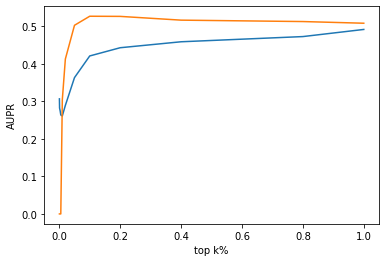

In [92]:
plt.plot(pvalues,aupr_cit)
plt.plot(pvalues,aupr_our)
plt.xlabel("top k%")
plt.ylabel("AUPR")

In [37]:
list(y_cit)

[0.0,
 0.5641025641025641,
 0.5636363636363636,
 0.5483870967741935,
 0.5384615384615384,
 0.527027027027027,
 0.5185185185185185,
 0.5119047619047619,
 0.5172413793103449,
 0.5172413793103449,
 0.5217391304347826,
 0.5104166666666666,
 0.5,
 0.504950495049505,
 0.504950495049505,
 0.4857142857142857,
 0.4811320754716981,
 0.4954128440366973,
 0.4954128440366973,
 0.4909090909090909,
 0.48672566371681414,
 0.4827586206896552,
 0.48717948717948717,
 0.48739495798319327,
 0.48360655737704916,
 0.4796747967479675,
 0.4838709677419355,
 0.48,
 0.4881889763779528,
 0.5,
 0.49242424242424243,
 0.49624060150375937,
 0.5,
 0.5,
 0.5,
 0.5035971223021583,
 0.5035460992907801,
 0.5069444444444444,
 0.5,
 0.5,
 0.5,
 0.5033557046979866,
 0.5033112582781457,
 0.5032258064516129,
 0.5095541401273885,
 0.5094339622641509,
 0.5125,
 0.515527950310559,
 0.5153374233128835,
 0.5151515151515151,
 0.5120481927710844,
 0.5120481927710844,
 0.5176470588235295,
 0.5232558139534884,
 0.5202312138728323,
 0.5

In [39]:
y_cit=list(y_cit)
y_cit[0]=y_cit[1]

In [38]:
x_our[0]

0.0041

In [116]:
x_our=list(x_our)
x_our.insert(0,0)
y_our=list(y_our)
y_our.insert(0,0.9047619047619048)

AUPR for our method [0.0, 0.0, 0.0, 0.0, 0.30388738941370524, 0.4124725463734752, 0.5023643615273939, 0.5264517099491064, 0.5260709402959963, 0.5160613126704054, 0.5123224516253793, 0.507854139192451]
AUPR for CIT 0.4912865984218058


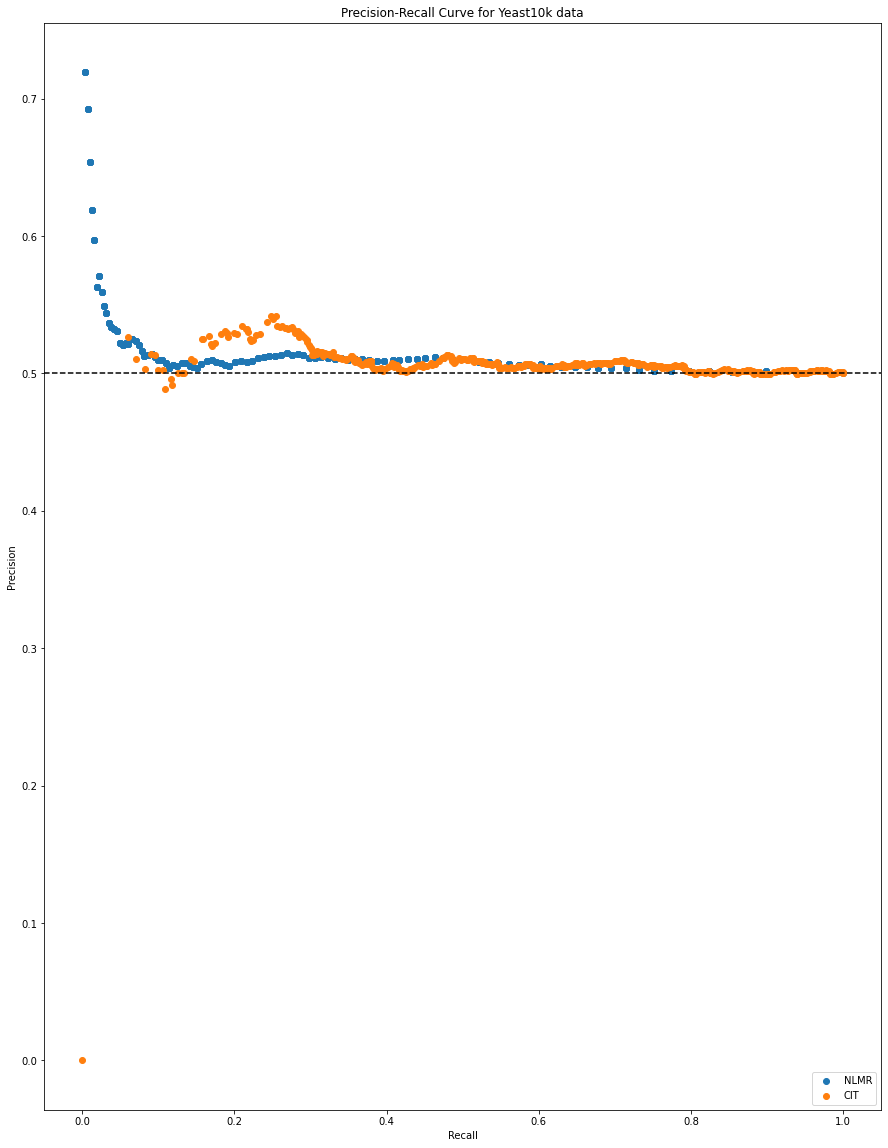

In [56]:
plt.figure(figsize=(15,20))
plt.scatter(x_our,y_our,label="NLMR")
plt.scatter(x_cit,y_cit,label="CIT")
plt.axhline(y=0.5, color='k', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Yeast10k data")
print("AUPR for our method",aupr_our)
print("AUPR for CIT",aupr_cit)
plt.show()

In [41]:
x_our[-1]

1.0

In [42]:
metrics.auc(x_our,y_our)

0.5079366659109499

In [43]:
metrics.auc(x_cit,y_cit)

0.5041852833012521